In [59]:
# Load necessary library and module
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import string
import unicodedata
import nltk


nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline
# %load_ext google.colab.data_table

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:

mlbb=pd.read_csv( "dataset/mlbb_textblobvader_clean_content_24062022_noneutral.csv",encoding='utf-8')


In [44]:
mlbb.head()


,content,score,label,sentiment,polarity,textblob_sentiment,textblob_polarity,textblob_subject,vader_compound,vader_neg,vader_neu,vader_pos,clean_content,clean_vader_compound,clean_vader_neg,clean_vader_neu,clean_vader_pos,clean_textblob_sentiment,clean_textblob_polarity,clean_textblob_subject
0,"I'd rate higher but there's a problem, everyti...",1.0,negative,0.0,negative,"Sentiment(polarity=0.30625, subjectivity=0.625)",0.306250,0.625000,0.9224,0.107,0.687,0.206,rate higher problem hold hero alway disappear ...,0.8957,0.145,0.516,0.339,"Sentiment(polarity=0.4625, subjectivity=0.45)",0.462500,0.450000
1,"just recently, it can't even start a game. It ...",1.0,negative,0.0,negative,"Sentiment(polarity=-0.040000000000000036, subj...",-0.040000,0.490000,0.6728,0.044,0.845,0.111,recent even start game alway crash hero select...,-0.5423,0.221,0.681,0.098,"Sentiment(polarity=-0.30000000000000004, subje...",-0.300000,0.362500
2,"The game is fun, interesting, has a lot of her...",1.0,negative,0.0,negative,"Sentiment(polarity=0.09999999999999999, subjec...",0.100000,0.350000,-0.0745,0.102,0.773,0.126,game interest hero recent game bug mani time s...,0.4404,0.211,0.493,0.296,"Sentiment(polarity=-0.26666666666666666, subje...",-0.266667,0.350000
3,Its been more than 4 years im playing this gam...,1.0,negative,0.0,negative,"Sentiment(polarity=0.13205128205128205, subjec...",0.132051,0.511966,0.9325,0.060,0.742,0.198,year play game never went previous match hero ...,0.8225,0.107,0.591,0.302,"Sentiment(polarity=-0.004166666666666666, subj...",-0.004167,0.488194
4,You know what? I don't care anymore. The devel...,1.0,negative,0.0,negative,"Sentiment(polarity=-0.22120181405895692, subje...",-0.221202,0.331066,-0.5931,0.109,0.841,0.050,know care develop never play around game long ...,0.5520,0.071,0.733,0.196,"Sentiment(polarity=-0.35, subjectivity=0.39999...",-0.350000,0.400000


In [45]:

mlbb = mlbb[['clean_content','score','sentiment','polarity']]



# Remove NULL Values

In [46]:

mlbb= mlbb[mlbb['clean_content'].notna()]


In [47]:
class_names = ['negative', 'positive']

# Split Training And Testing Dataset 
## shopee Dataset

In [74]:

dataset=mlbb
X = dataset['clean_content']     # Define feature matriX
y = dataset['sentiment']         # Define target feature matriX
jumlahdatauji=0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=jumlahdatauji, random_state=42, stratify=y)

datalatih=('Dataset {} {}:{} \n [INFO] Sebaran kelas pada training  set: \n negative: \t {} \n neutral: \t{} \n positive:\t{} \n'.format(dataset,(1-jumlahdatauji)*100,jumlahdatauji*100,sum(y_train==0), sum(y_train==1), sum(y_train==2)))
datauji=('[INFO] Sebaran kelas pada testing set:\n negative: \t{}\n neutral: \t{}\n positive:\t{} \n'.format(sum(y_test==0), sum(y_test==1), sum(y_test==2)))

dimensi_data=('[INFO] Shape Data: \n X_train: \t {} \n X_test: \t {} \n y_train: \t {} \n y_test: \t {} \n'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

with open('hasil/datauji-mlbb-25062022-pipe-gridsearch.txt', 'a', encoding='utf-8') as f:
    f.writelines(''.join(datalatih))
    f.writelines(''.join(datauji))
    f.writelines(''.join(dimensi_data))

print(datalatih, datauji, dimensi_data)


Dataset                                           clean_content  score  sentiment  \
0     rate higher problem hold hero alway disappear ...    1.0        0.0   
1     recent even start game alway crash hero select...    1.0        0.0   
2     game interest hero recent game bug mani time s...    1.0        0.0   
3     year play game never went previous match hero ...    1.0        0.0   
4     know care develop never play around game long ...    1.0        0.0   
...                                                 ...    ...        ...   
1194                                    ishsa1 kan dian    5.0        2.0   
1195                                          good game    5.0        2.0   
1197                                          game good    5.0        2.0   
1198                                nice hope give skin    5.0        2.0   
1199                       play like request skill less    5.0        2.0   

      polarity  
0     negative  
1     negative  
2     negative  

## Training dan Testing shopee Dataset


In [75]:
# X_train_data=pd.DataFrame(X_train)
# X_test_data=pd.DataFrame(X_test)
X_train.to_csv( "hasil/mlbb/mlbb_train_70_25062022.csv", index=False, encoding='utf-8-sig')
X_test.to_csv( "hasil/mlbb/mlbb_test_30_25062022.csv", index=False, encoding='utf-8-sig')


# Term Weighting TFIDF X Training and Y Testing

## TFIDF SELURUH DATASET

In [85]:
# ngram_range = (1,2) #bigram
ngram_range = (1,3) #trigram

min_df = 10

tfidf = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df,max_features=1000)
# tfidf = TfidfVectorizer(max_features=1000)
vectors = tfidf.fit_transform(dataset.clean_content).toarray()
words_df = pd.DataFrame(vectors, columns=tfidf.get_feature_names())
words_df.head(10)


,account,actual,addict,affect,almost,also,alway,annoy,around,automat,...,wast,weak,week,well,without,work,worst,would,wrong,year
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.161122,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.187300
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.272590,0.0,0.212389,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.291121,0.0,0.0,0.0,0.158439
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.422873,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.154968,0.0,0.0,0.0,0.168679
4,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.461210,0.0,...,0.0,0.0,0.000000,0.0,0.209887,0.000000,0.0,0.0,0.0,0.000000
5,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
6,0.0,0.0,0.0,0.0,0.333137,0.121578,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.000000,0.000000,0.131330,0.0,0.000000,0.0,...,0.0,0.0,0.198485,0.0,0.000000,0.000000,0.0,0.0,0.0,0.152668
8,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.164905
9,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000


## TFIDF X TRAIN 

In [86]:


X_train_to_df = tfidf.fit_transform(X_train).toarray()
train_words_df = pd.DataFrame(X_train_to_df, columns=tfidf.get_feature_names())
train_words_df.head(10)


,account,actual,addict,almost,also,alway,annoy,back,best,better,...,want,wast,week,well,without,work,worst,would,wrong,year
0,0.000000,0.000000,0.0,0.0,0.291843,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.225986
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.771982,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
5,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.219394,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.000000
7,0.000000,0.000000,0.0,0.0,0.127459,0.0,0.161171,0.000000,0.0,0.179049,...,0.0,0.0,0.194058,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,0.000000,0.244498,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,0.650288,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [87]:
train_words_df.to_csv( "hasil/mlbb/mlbb_train_tfidf_trigram_max1000_25062022.csv", index=False, encoding='utf-8-sig')

## TFIDF Y TEST 

In [88]:

X_test_to_df = tfidf.transform(X_test).toarray()
test_words_df = pd.DataFrame(X_test_to_df, columns=tfidf.get_feature_names())
test_words_df.head(10)

,account,actual,addict,almost,also,alway,annoy,back,best,better,...,want,wast,week,well,without,work,worst,would,wrong,year
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.393317,0.0,0.000000,0.0,0.380806,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.251283,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.486579,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.259591,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.460757,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.287726,0.0,0.0,0.000000,0.000000,0.0,...,0.164188,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0


In [89]:
test_words_df.to_csv( "hasil/mlbb/mlbb_test_tfidf_trigram_max1000_25062022.csv", index=False, encoding='utf-8-sig')

## LDA Dimension Reduction of TFIDF


In [ ]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold = 0.0002)
constant_filter.fit(train_words_df)
feature_list = train_words_df[train_words_df.columns[
    constant_filter.get_support(indices=True)]]

print('Number of selected features: ' ,len(list(feature_list)),'\n')
print('List of selected features: \n' ,list(feature_list))

In [149]:
def get_correlation(data, threshold):
    corr_col = set()
    cormat = data.corr()
    for i in range(len(cormat.columns)):
        for j in range(i):
            if abs(cormat.iloc[i,j]) > threshold:
                colname = cormat.columns[i]
                corr_col.add(colname)
    return corr_col


In [150]:
x_train_filter = constant_filter.transform(X_train)
x_test_filter = constant_filter.transform(X_test)
x_train_filter = pd.DataFrame(x_train_filter)
x_test_filter = pd.DataFrame(x_test_filter)
corr_features = get_correlation(x_train_filter, 0.70)

In [153]:
print(corr_features)

{387, 141, 404, 662, 535, 663, 668, 542, 545, 548, 173, 52, 436, 319, 194, 452, 591, 208, 349, 350, 95, 97, 616, 619, 364, 503, 376, 249}


In [155]:
x_train_uncorr = x_train_filter.drop(labels= corr_features, axis = 1)
x_test_uncorr = x_test_filter.drop(labels= corr_features, axis = 1)
x_train_uncorr = pd.DataFrame(x_train_uncorr)
x_test_uncorr = pd.DataFrame(x_test_uncorr)
x_train_uncorr.shape, x_test_uncorr.shape

((815, 667), (350, 667))

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA(n_components=2)
x_train_lda = lda.fit_transform(x_train_uncorr, y_train)
x_test_lda = lda.fit_transform(x_test_uncorr, y_test)

In [157]:
lda_train_df = pd.DataFrame(x_test_lda)
lda_train_df.head(100)

,0,1
0,-4.734635,-2.428751
1,5.119248,-2.068796
2,-4.734635,-2.428751
3,-4.734635,-2.428751
4,0.528348,2.949427
...,...,...
95,-0.084275,1.133274
96,-4.734635,-2.428751
97,-4.734635,-2.428751
98,-0.539879,5.083484


# Training Session

In [91]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier

## TFIDF TRANSFORMER

In [80]:
from typing import Callable
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer

class DimTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, *_):
        return self
    def transform(self, X, *_):
        return pd.DataFrame(X)

# Use FunctionTransformer to ensure dense matrix
def tf_text(X, vectorizer_tf: Callable):
    X_vect_ = vectorizer_tf.fit_transform(X)
    return X_vect_.toarray()

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
df=mlbb['clean_content']
tf_transformer = FunctionTransformer(tf_text, kw_args={'vectorizer_tf': CountVectorizer()})

# Transformation Pipelines
tf_transformer_pipe = Pipeline(
    steps = [('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
             ('dt', DimTransformer()),
             ('ct', ColumnTransformer([
                 ('tf1', tf_transformer, 0), 
                 ('tf2', tf_transformer, 1)
             ]))    
])
ohe_transformer_pipe = Pipeline(
    steps = [('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
             ('ohe', OneHotEncoder(handle_unknown='ignore', sparse=False))])

transformer = ColumnTransformer(transformers=[
    ('cat_ohe', ohe_transformer_pipe, ['sentiment']),
    ('cat_tf', tf_transformer_pipe, ['content', 'clean_content'])
], remainder='passthrough')

transformed_df = transformer.fit_transform(df)


IndexError: tuple index out of range

# LSI SVD PIPELINE

In [94]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#create GridSearchCV object with set of possible parameters
Cs = [0.001, 0.01, 0.1, 1, 10, 100]
gammas = [0.001, 0.01, 0.1, 1, 10,100]
kernel = ['linear','rbf','poly']
param_grid = {'C': Cs, 'gamma': gammas,'kernel': kernel}

Grids = GridSearchCV(SVC(), param_grid=param_grid)

#create TruncatedSVD object with n_components=100
svd=TruncatedSVD(n_components=100)

#create a pipeline that receives the model steps: TruncatedSVD and GridSearchCV with a SVC
pipeline=make_pipeline(svd,Grids)
pipeline.fit(X_train, y_train) #fit the model
genreResult = pipeline.predict(X_test) #predict the model
print(classification_report(genreResult, y_test )) #print classification report

ValueError: could not convert string to float: 'control hero kill spawn cant control hero also went gone right like'

# Pipeline

In [62]:


pipe_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', SVC(random_state=42))])
            
param_range = [9, 10]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
        'clf__C': param_range}]

SVM = GridSearchCV(estimator=pipe_svm,
            param_grid=grid_params_svm,
            scoring='accuracy',
            cv=10,
            n_jobs=-1)

pipe = Pipeline([
    ('bag_of_words', CountVectorizer()),
    ('estimator', SVC())])


In [25]:
pipe_parameters = [
    {'bag_of_words__max_features': (None, 1500),
     'estimator__C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000 ], 
     'estimator__gamma': [1,1e-2, 1e-3, 1e-4, 1e-5],
     'estimator__kernel': ['rbf']},
    {'bag_of_words__max_features': (None, 1500),
     'estimator__C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
     'estimator__kernel': ['sigmoid'],
     'estimator__gamma': [1,1e-2, 1e-3, 1e-4, 1e-5]},
    {'bag_of_words__max_features': (None, 1500),
     'estimator__C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000],
     'estimator__kernel': ['linear']}
]

In [ ]:
SVM.fit(X_train, y_train)

### TUNING SVM USING GRID SEARCH CV

In [ ]:

tuned_parameters =  [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]},
                    {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },
                     {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000]}]              

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear','poly','sigmoid']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3,scoring='accuracy')
 
# fitting the model for grid search
grid.fit(X_train, y_train)

## Pipeline Grid Search

In [35]:
X_train.shape
flat_x_train=X_train.flatten()


In [36]:
y_train.shape

(513,)

In [37]:
print(flat_x_train)

[0. 0. 0. ... 0. 0. 0.]


In [63]:
grid = GridSearchCV(pipe, pipe_parameters, cv=2,refit = True, verbose = 3,scoring='accuracy')
grid.fit(X_train, y_train)

grid.best_params_

Fitting 2 folds for each of 176 candidates, totalling 352 fits
[CV 1/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=1, estimator__kernel=rbf;, score=nan total time=   0.0s
[CV 2/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=1, estimator__kernel=rbf;, score=nan total time=   0.0s
[CV 1/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf;, score=nan total time=   0.0s
[CV 2/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=0.01, estimator__kernel=rbf;, score=nan total time=   0.0s
[CV 1/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=0.001, estimator__kernel=rbf;, score=nan total time=   0.0s
[CV 2/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=0.001, estimator__kernel=rbf;, score=nan total time=   0.0s
[CV 1/2] END bag_of_words__max_features=None, estimator__C=0.001, estimator__gamma=0.0001

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [125]:
from sklearn import metrics



In [24]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
with open('hasil/datauji-mlbb-24062022.txt', 'a', encoding='utf-8') as f:
    f.writelines('Best Parameter: '+str(grid.best_params_)+'\n')
    f.writelines('Best Estimator: '+str(grid.best_estimator_)+'\n')
    f.writelines('Best Score: '+str(grid.best_score_)+'\n')

{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}
SVC(C=1, gamma=1, kernel='sigmoid')


In [18]:
grid_predictions = grid.predict(X_test)
 
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74       115
         2.0       0.72      0.73      0.72       106

    accuracy                           0.73       221
   macro avg       0.73      0.73      0.73       221
weighted avg       0.73      0.73      0.73       221



In [26]:
with open('hasil/datauji-mlbb-24062022.txt', 'a', encoding='utf-8') as f:
    f.writelines('Hasil GridSearch Test Classification: '+'\n'+str(classification_report(y_test, grid_predictions))+'\n')
    

In [162]:
grid.fit(x_train_lda, y_train)
grid_predictions = grid.predict(x_test_lda)
 
# print classification report
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.896 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.939 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.914 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.896 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.939 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.908 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=pol

# Training Session shopee Dataset

In [28]:
C=1
# Create and train a random forest classifier
# forest = RandomForestClassifier()
models = [
          # ('k-NN', KNeighborsClassifier()),
          ('SVC linear kernel', SVC(kernel='linear',C=C,max_iter=10000)),
          ('SVC RBF kernel', SVC(kernel='rbf',gamma=1,C=C)), 
          ('SVC Polynomial (degree 3)', SVC(kernel='poly',degree=3,C=C)),
          ('SVC Sigmoid ', SVC(kernel='sigmoid',C=C,gamma=1)),
          # ('Naive Bayes', MultinomialNB()),
          # ('Decision Tree', DecisionTreeClassifier()),
          # ('Random Forest',RandomForestClassifier(n_estimators=50)),
          # ('Regresi Linier',LogisticRegression()),
        ]


In [35]:
for name, clf in models:
  clf.fit(X_train, y_train)
  # clf.fit(x_train_lda, y_train) #using LDA
  train_acc = accuracy_score(y_train, clf.predict(X_train))
  # train_acc = accuracy_score(y_train, clf.predict(x_train_lda)) #Using LDA
  latih=('Dataset {}, data split : {}:{} \n'.format('mlbb',(1-jumlahdatauji)*100,jumlahdatauji*100))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Training Menggunakan {}, akurasi pada training set: {} \n'.format(name, train_acc))
  with open('hasil/training_result_mlbb_7030_24062022.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(latih))
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Training Menggunakan SVC linear kernel, akurasi pada training set: 0.7582846003898636 

[INFO] Training Menggunakan SVC RBF kernel, akurasi pada training set: 0.9025341130604289 

[INFO] Training Menggunakan SVC Polynomial (degree 3), akurasi pada training set: 0.9473684210526315 

[INFO] Training Menggunakan SVC Sigmoid , akurasi pada training set: 0.7017543859649122 



# Testing

In [36]:
for name, clf in models:
  # clf_predict = 
  clf.predict(X_test)
  # clf.predict(x_test_lda) #Using LDA
  test_acc = accuracy_score(y_test, clf.predict(X_test))
  # test_acc = accuracy_score(y_test, clf.predict(x_test_lda)) #using LDA
  latih=('Dataset {}, data split : {}:{} \n'.format('mlbb',(1-jumlahdatauji)*100,jumlahdatauji*100))
  printed_dataset=('Dataset: {} \t'.format('mlbb'))
  printed=('[INFO] Testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, test_acc))
  # printed=('[INFO] testing Menggunakan {}, akurasi pada testing set: {} \n'.format(name, train_acc))
  with open('hasil/testing_result_mlbb_24062022.txt', 'a', encoding='utf-8') as f:
    f.writelines('\n'+(latih))
    f.writelines(''.join(printed_dataset))
    f.writelines(''.join(printed))
  
  print(printed)

[INFO] Testing Menggunakan SVC linear kernel, akurasi pada testing set: 0.7420814479638009 

[INFO] Testing Menggunakan SVC RBF kernel, akurasi pada testing set: 0.7239819004524887 

[INFO] Testing Menggunakan SVC Polynomial (degree 3), akurasi pada testing set: 0.7104072398190046 

[INFO] Testing Menggunakan SVC Sigmoid , akurasi pada testing set: 0.7330316742081447 



# Cross Validation

In [44]:
# cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# k=[3,5,7,10,12,15]
k=[5,7,12]
for x in (k):
  for name, model in models:
    clf.fit(X_train, y_train) #using LDA
    # clf.fit(x_train_lda, y_train) #using LDA
    cv = KFold(n_splits=x, random_state=42, shuffle=True)
    # cross_val_acc = GridSearchCV(SVC(), param_grid, cv=cv,refit = True, verbose = 3,scoring='accuracy')
    # grid.fit(X_train, y_train)
    # cross_val_acc = GridSearchCV(SVC(), tuned_parameters, cv=cv, scoring='accuracy') #USING GRIDSEARCH
    # cross_val_acc = cross_val_score(clf, x_train_lda, y_train, cv=cv, scoring='accuracy') #USING LDA
    cross_val_acc = cross_val_score(clf, X_train, y_train, cv=cv, scoring='accuracy')
    printed_dataset=('Dataset: {} \t'.format('mlbb'))
    printed=('[INFO] {}x Cross Validation Menggunakan {}, Cross-validation akurasi: {:5f} (+/- {:5f}) \n'.format(x,name, cross_val_acc.mean(), cross_val_acc.std() * 2))
    with open('hasil/training_result_mlbb_crossval_24062022.txt', 'a', encoding='utf-8') as f:
      f.writelines('\n'+'Gridsearch')
      f.writelines('\n'+(latih))
      f.writelines(''.join(printed_dataset))
      f.writelines(''.join(printed))
    
    print(printed)
    # f.writelines(''.join("\n"))

[INFO] 5x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.645326 (+/- 0.109018) 

[INFO] 5x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.645326 (+/- 0.109018) 

[INFO] 5x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.645326 (+/- 0.109018) 

[INFO] 5x Cross Validation Menggunakan SVC Sigmoid , Cross-validation akurasi: 0.645326 (+/- 0.109018) 

[INFO] 7x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.621807 (+/- 0.153568) 

[INFO] 7x Cross Validation Menggunakan SVC RBF kernel, Cross-validation akurasi: 0.621807 (+/- 0.153568) 

[INFO] 7x Cross Validation Menggunakan SVC Polynomial (degree 3), Cross-validation akurasi: 0.621807 (+/- 0.153568) 

[INFO] 7x Cross Validation Menggunakan SVC Sigmoid , Cross-validation akurasi: 0.621807 (+/- 0.153568) 

[INFO] 12x Cross Validation Menggunakan SVC linear kernel, Cross-validation akurasi: 0.647379 (+/- 0.171015) 

[INFO] 12

Training Confusion Matrix

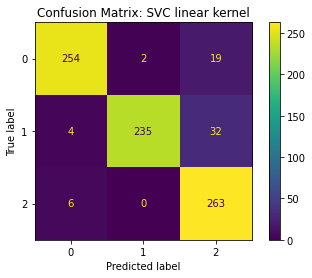

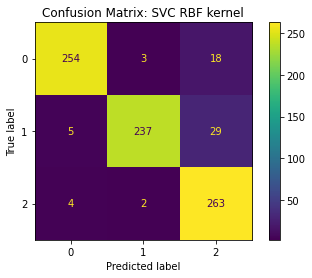

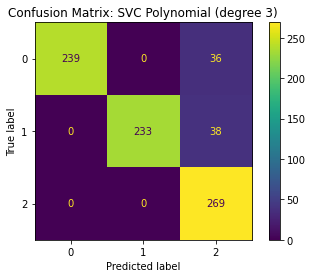

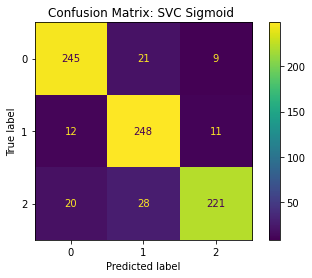

In [167]:
from sklearn.metrics import plot_confusion_matrix

for name, model in models:
  plot_confusion_matrix(model,x_train_lda, y_train) 
  plt.title('Confusion Matrix: {}'.format(name))
  plt.show()

# Laporan Testing

In [168]:
print("[INFO] Laporan klasifikasi\n")
for name, clf in models:
  clf_predict = clf.predict(x_test_lda)
  print('[INFO] Menggunakan {}'.format(name))
  print(classification_report(y_test, clf_predict, target_names=['0','1', '2']))

[INFO] Laporan klasifikasi

[INFO] Menggunakan SVC linear kernel
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       119
           1       1.00      0.92      0.96       116
           2       0.88      0.97      0.93       115

    accuracy                           0.95       350
   macro avg       0.95      0.95      0.95       350
weighted avg       0.95      0.95      0.95       350

[INFO] Menggunakan SVC RBF kernel
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       119
           1       1.00      0.90      0.95       116
           2       0.86      0.98      0.92       115

    accuracy                           0.94       350
   macro avg       0.95      0.94      0.94       350
weighted avg       0.95      0.94      0.94       350

[INFO] Menggunakan SVC Polynomial (degree 3)
              precision    recall  f1-score   support

           0       0.97      0.94      

Testing Confusion Matrix

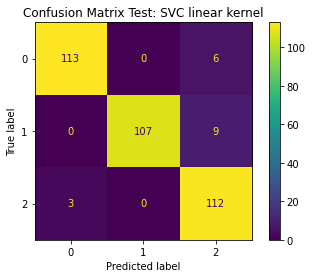

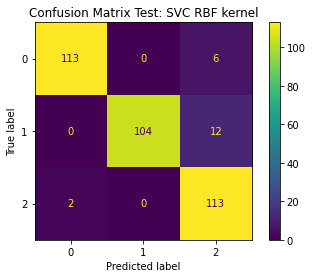

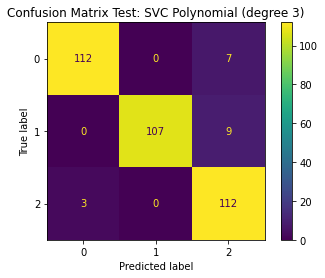

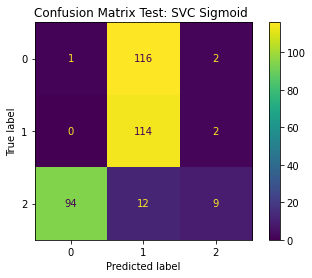

In [169]:
for name, model in models:
  
  plot_confusion_matrix(model, x_test_lda, y_test) 
  plt.title('Confusion Matrix Test: {}'.format(name))
  
  plt.show()